In [11]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.datasets import load_boston, load_iris
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.linear_model import Lasso, ElasticNet,SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler


from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPRegressor # 딥러닝 neural_network
from sklearn.metrics import r2_score# 선형 모델(Linear Models)

import mglearn
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

import warnings
warnings.simplefilter('ignore')

In [3]:
boston = load_boston()

boston_df = pd.DataFrame(  boston['data'],columns=boston['feature_names'])
boston_df['MEDV'] =boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
x_data = boston_df.iloc[:,:-1]
y_data = boston_df.iloc[:,-1]

In [6]:
x_train, x_test, y_train, y_test=train_test_split(x_data, y_data, test_size=0.2, random_state=1)

## 릿지 회귀(Ridge Regression) L2규제

* 릿지 회귀는 선형 회귀를 개선한 선형 모델
* 릿지 회귀는 선형 회귀와 비슷하지만, 가중치의 값을 최대한 작게 만든다는 것이 다름
* 이러한 방법은 각각의 특성(feature)이 출력 값에 주는 영향을 최소한으로 만들도록 규제(regularization)를 거는 것
* 규제를 사용하면 다중공선성(multicollinearity) 문제를 방지하기 때문에 모델의 과대적합을 막을 수 있게 됨
* 다중공선성 문제는 두 특성이 일치에 가까울 정도로 관련성(상관관계)이 높을 경우 발생
* 릿지 회귀는 다음과 같은 함수를 최소화 하는 파라미터 $w$를 찾음
* α=0이면 릿지회귀는 선형회귀와 같아지고, α가 커질수록 모든 가중치가 0에 가까워져 결국 데이터의 평균을 지나는 수평선이 된다.

\begin{equation}
RidgeMSE = \frac{1}{N} \sum_{i=1}^{N}(y_i - \hat{y}_i)^2 + \alpha \sum_{i=1}^{p} w_i^2
\end{equation}

  + $\alpha$: 사용자가 지정하는 매개변수
  * $\alpha$가 크면 규제의 효과가 커지고, $\alpha$가 작으면 규제의 효과가 작아짐

In [13]:
# 파이프라인을 통해 정규화 alpha = 0이면 선형회귀
model_ridge = make_pipeline(StandardScaler(),Ridge(alpha=1.0)) 
model_ridge.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [14]:
print(model_ridge.score(x_train, y_train))
print(model_ridge.score(x_test, y_test))

0.729336032904444
0.7634038058032347


### alpha = 5로 설정

In [15]:
# alpha = 5로 설정
model_ridge5 = make_pipeline(StandardScaler(),Ridge(alpha=5)) 
model_ridge5.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('ridge',
                 Ridge(alpha=5, copy_X=True, fit_intercept=True, max_iter=None,
                       normalize=False, random_state=None, solver='auto',
                       tol=0.001))],
         verbose=False)

In [16]:
# R2
print(model_ridge5.score(x_train, y_train))
print(model_ridge5.score(x_test, y_test))

0.7289067264142004
0.7629020804027656


## 라쏘 회귀(Lasso Regression) L1규제


* 선형 회귀에 규제를 적용한 또 다른 모델로 라쏘 회귀가 있음
* 라쏘 회귀는 릿지 회귀와 비슷하게 가중치를 0에 가깝게 만들지만, 조금 다른 방식을 사용

* 라쏘 회귀에서는 다음과 같은 함수를 최소화 하는 파라미터 $w$를 찾음

\begin{equation}
LassoMSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 + \alpha \sum_{i=1}^{p} |w_i|
\end{equation}

* 라쏘 회귀도 매개변수인 $\alpha$ 값을 통해 규제의 강도 조절 가능

In [18]:
model_lasso = Lasso(alpha=0.5)
model_lasso.fit(x_train, y_train)

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [19]:
print( model_lasso.score( x_train, y_train ) )
print( model_lasso.score( x_test, y_test) )

0.7003419060083982
0.7092912054989273


In [66]:
# 딕셔너리형태
param_value = {'alpha':[0.0001, 0.01, 1, 2, 3, 4]}

modelLasso = Lasso()
# 교차검증까지 실행
gridSearch = GridSearchCV(modelLasso, param_grid=param_value, cv=10)
gridSearch.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.01, 1, 2, 3, 4]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [32]:
print(gridSearch.best_params_)
print('-'*30)
print(gridSearch.best_score_) # r2(결정계수)
print('-'*30)
print(gridSearch.cv_results_)

{'alpha': 0.0001}
------------------------------
0.7060059392545496
------------------------------
{'mean_fit_time': array([0.00199262, 0.00101916, 0.00165669, 0.0013295 , 0.00132982,
       0.00099746]), 'std_fit_time': array([8.14108842e-04, 3.17507751e-05, 4.76035809e-04, 4.70302644e-04,
       4.69909263e-04, 1.12391596e-07]), 'mean_score_time': array([0.        , 0.00099834, 0.0006694 , 0.00099723, 0.00066487,
       0.        ]), 'std_score_time': array([0.00000000e+00, 5.75616168e-06, 4.73369720e-04, 2.97360213e-07,
       4.70134207e-04, 0.00000000e+00]), 'param_alpha': masked_array(data=[0.0001, 0.01, 1, 2, 3, 4],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'alpha': 0.0001}, {'alpha': 0.01}, {'alpha': 1}, {'alpha': 2}, {'alpha': 3}, {'alpha': 4}], 'split0_test_score': array([0.67328707, 0.67120528, 0.60711977, 0.54830485, 0.50485731,
       0.48581567]), 'split1_test_score': array([0.72372639, 0.72

In [33]:
# 0.0001이 적용된 예측값
gridSearch.best_estimator_.predict(x_test)

array([32.65451755, 28.09425116, 18.02726711, 21.47629568, 18.82908552,
       19.88077272, 32.41998143, 18.06708964, 24.41908704, 27.00953035,
       27.03787347, 28.75393746, 21.15618569, 26.85041791, 23.38805586,
       20.66176498, 17.33031598, 38.24714047, 30.50412507,  8.74996034,
       20.80262417, 16.26920784, 25.21841717, 24.85309794, 31.38345601,
       10.71240508, 13.8046697 , 16.66025695, 36.52842352, 14.66802031,
       21.12315375, 13.95484118, 43.160864  , 17.97790542, 21.80116716,
       20.58470696, 17.60156619, 27.22266959,  9.46018155, 19.82795804,
       24.30765777, 21.18903539, 29.57143119, 16.33972352, 19.31295781,
       14.56458086, 39.20563841, 18.1096834 , 25.91031161, 20.32943949,
       25.16213668, 24.42813032, 25.07251632, 26.65826038,  4.55804761,
       24.08270516, 10.88692104, 26.89010932, 16.85748247, 35.88685368,
       19.55883708, 27.51889298, 16.58465045, 18.7722969 , 11.13779245,
       32.36427557, 36.7282874 , 21.96093821, 24.5767824 , 25.14

In [ ]:
## L1,L2를 하는 이유는 다중공선성과 과대적합을 줄이기 위해

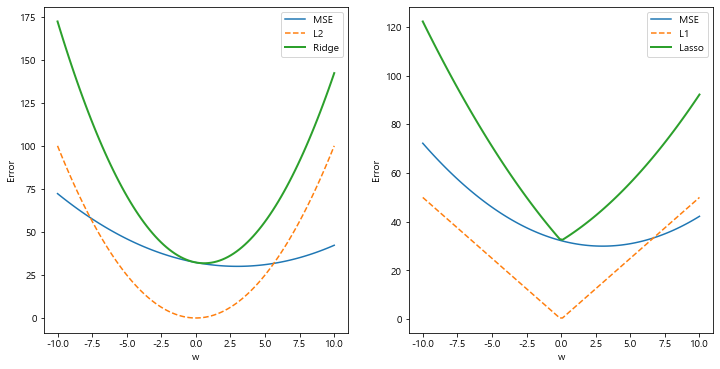

In [35]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=[12,6])

rng = np.linspace(-10,10,100)
mse = ( 0.5*(rng-3) )**2 + 30
l2 = rng**2
l1 = 5*np.abs(rng)
ridge = mse + l2
lasso = mse + l1


plt.subplot(1,2,1)
plt.plot(rng,mse,label='MSE')
plt.plot(rng,l2,'--',label='L2')
plt.plot(rng,ridge, lw=2, label='Ridge')
plt.xlabel('w'); plt.ylabel('Error')
plt.legend()

plt.subplot(1,2,2)
plt.plot(rng,mse,label='MSE')
plt.plot(rng,l1,'--',label='L1')
plt.plot(rng,lasso, lw=2, label='Lasso')
plt.xlabel('w'); plt.ylabel('Error')
plt.legend()


## 신축망 (Elastic-Net)

* 신축망은 릿지 회귀와 라쏘 회귀, 두 모델의 모든 규제를 사용하는 선형 모델
* 두 모델의 장점을 모두 갖고 있기 때문에 좋은 성능을 보임
* 데이터 특성이 많거나 서로 상관 관계가 높은 특성이 존재 할 때 위의 두 모델보다 좋은 성능을 보여 줌

* 신축망은 다음과 같은 함수를 최소화 하는 파라미터 $w$를 찾음

\begin{equation}
ElasticMSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i) + \alpha \rho \sum_{i=1}^{p} |w_i| + \alpha (1 - \rho) \sum_{i=1}^{p} w_i^2
\end{equation}

  + $\alpha$: 규제의 강도를 조절하는 매개변수
  + $\rho$: 라쏘 규제와 릿지 규제 사이의 가중치를 조절하는 매개변수

In [41]:
# p => l1_ratio=0.5 (l1과 l2에 똑같은 값을 줌)
model_elastic = ElasticNet(alpha=0.01, l1_ratio=0.5)
model_elastic.fit(x_train,y_train)

ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [42]:
print( model_elastic.score( x_train, y_train ) )
print( model_elastic.score( x_test, y_test) )

0.7231027704401572
0.7639149100563346


In [73]:
# 딕셔너리형태
param_value = {'alpha':[0.0001, 0.01, 1, 2, 3, 4],
              'l1_ratio': [0.1, 0.3,0.5,0.7,0.8, 0.9] }
modelElastic = ElasticNet()
gridSearch = GridSearchCV( modelElastic, param_grid= param_value, cv=10)
gridSearch.fit( x_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.01, 1, 2, 3, 4],
                         'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.8, 0.9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [75]:
gridSearch.best_params_

{'alpha': 0.0001, 'l1_ratio': 0.1}

In [76]:
gridSearch.best_score_

0.6774642081707202

## 다항 회귀 (Polynomial Regression)

* 입력 데이터를 비선형 변환 후 사용하는 방법
* 모델 자체는 선형 모델

\begin{equation}
\hat{y} = w_1 x_1 + w_2 x_2 + w_3 x_3 + w_4 x_1^2 + w_5 x_2^2
\end{equation}

* 차수가 높아질수록 더 복잡한 데이터 학습 가능

![polynomial regression](https://scikit-learn.org/stable/_images/sphx_glr_plot_polynomial_interpolation_0011.png)

In [57]:
# PolynomialFeatures(degree=2) 차수 곡선형태로

model = make_pipeline(PolynomialFeatures(degree=2),StandardScaler(), LinearRegression())
model.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [63]:
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))


0.926404695716329
0.9116244055634304


## Sample

In [84]:
sample_size = 500
x = np.random.uniform(-20, 20, sample_size).reshape(-1,1)
y = x**4 + x**3 + x**2 + x + np.random.normal(0, 10, sample_size).reshape(-1, 1)
print(x.shape, y.shape)


(500, 1) (500, 1)


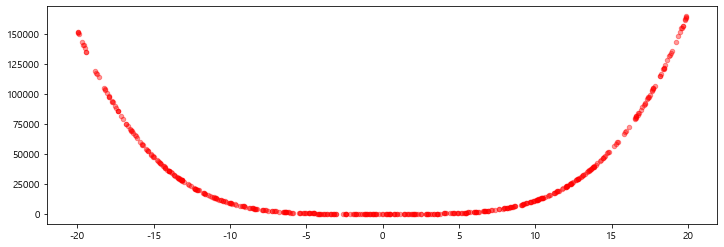

In [85]:
plt.figure(figsize=(12, 4))
plt.scatter(x, y, marker='o', s=20, alpha=0.4, c='red')
plt.show()


In [86]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    train_size =0.7, test_size=0.3)


In [87]:
# 정규화후 모델적용
model_lr = make_pipeline(StandardScaler(), LinearRegression())
model_lr.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [88]:
print( model_lr.score( x_train, y_train ) )
print( model_lr.score( x_test, y_test) )

0.0014819239833540054
-0.007418116803981523


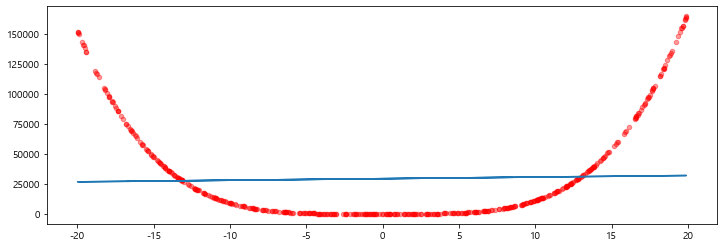

In [90]:
plt.figure(figsize=(12, 4))
plt.scatter(x, y, marker='o', s=20, alpha=0.4, c='red')
plt.plot(x, model_lr.predict(x)) # 선형예측
plt.show()

## NN(neural_network)

In [105]:
model_ml= make_pipeline(StandardScaler(),MLPRegressor(hidden_layer_sizes=[1000,4], max_iter=5000, alpha=0.005, random_state=1))
model_ml.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('mlpregressor',
                 MLPRegressor(activation='relu', alpha=0.005, batch_size='auto',
                              beta_1=0.9, beta_2=0.999, early_stopping=False,
                              epsilon=1e-08, hidden_layer_sizes=[1000, 4],
                              learning_rate='constant',
                              learning_rate_init=0.001, max_iter=5000,
                              momentum=0.9, n_iter_no_change=10,
                              nesterovs_momentum=True, power_t=0.5,
                              random_state=1, shuffle=True, solver='adam',
                              tol=0.0001, validation_fraction=0.1,
                              verbose=False, warm_start=False))],
         verbose=False)

In [103]:
print( model_ml.score( x_train, y_train ) )
print( model_ml.score( x_test, y_test) )

0.9911957281969073
0.9897501041204748


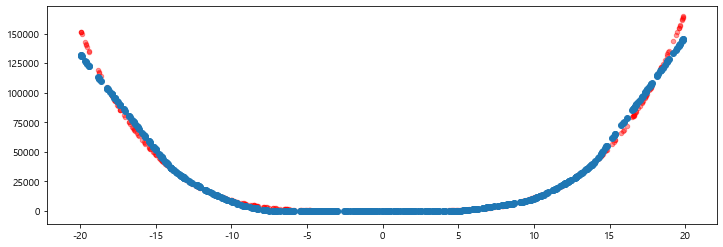

In [104]:
plt.figure(figsize=(12, 4))
plt.scatter(x, y, marker='o', s=20, alpha=0.4, c='red')
plt.scatter(x, model_ml.predict(x)) # 선형예측
plt.show()

## 결론
- 딥러닝이 정확도와 결정계수가 높다!
    * 데이터 특성에 맞게 핸들링이 가능하다.

- 딥러닝 알고리즘이 좋기는 하지만 머신러닝중 최적의 알고리즘을 적용할줄도
알아야한다.